In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [4]:
df = pd.read_excel("/content/sample_data/Aviation_KPIs_Dataset.xlsx")


In [5]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Flight Number                     200000 non-null  object        
 1   Scheduled Departure Time          200000 non-null  datetime64[ns]
 2   Actual Departure Time             200000 non-null  datetime64[ns]
 3   Delay (Minutes)                   200000 non-null  int64         
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64       
 5   Turnaround Time (Minutes)         200000 non-null  int64         
 6   Load Factor (%)                   200000 non-null  float64       
 7   Fleet Availability (%)            200000 non-null  float64       
 8   Maintenance Downtime (Hours)      200000 non-null  float64       
 9   Fuel Efficiency (ASK)             200000 non-null  float64       
 10  Revenue (USD)                   

In [9]:
# Filling numerical missing values with mean
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)


In [11]:
# Detecting Outliers using IQR (Only for Numeric Columns)
Q1 = df.select_dtypes(include=['number']).quantile(0.25)
Q3 = df.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1
outliers = ((df.select_dtypes(include=['number']) < (Q1 - 1.5 * IQR)) |
            (df.select_dtypes(include=['number']) > (Q3 + 1.5 * IQR)))

print("\nOutliers Detected:")
print(outliers.sum())



Outliers Detected:
Delay (Minutes)                        0
Aircraft Utilization (Hours/Day)       0
Turnaround Time (Minutes)              0
Load Factor (%)                        0
Fleet Availability (%)                 0
Maintenance Downtime (Hours)           0
Fuel Efficiency (ASK)                  0
Revenue (USD)                          0
Operating Cost (USD)                   0
Net Profit Margin (%)                  0
Ancillary Revenue (USD)                0
Debt-to-Equity Ratio                   0
Revenue per ASK                     1544
Cost per ASK                        1555
Profit (USD)                           0
dtype: int64


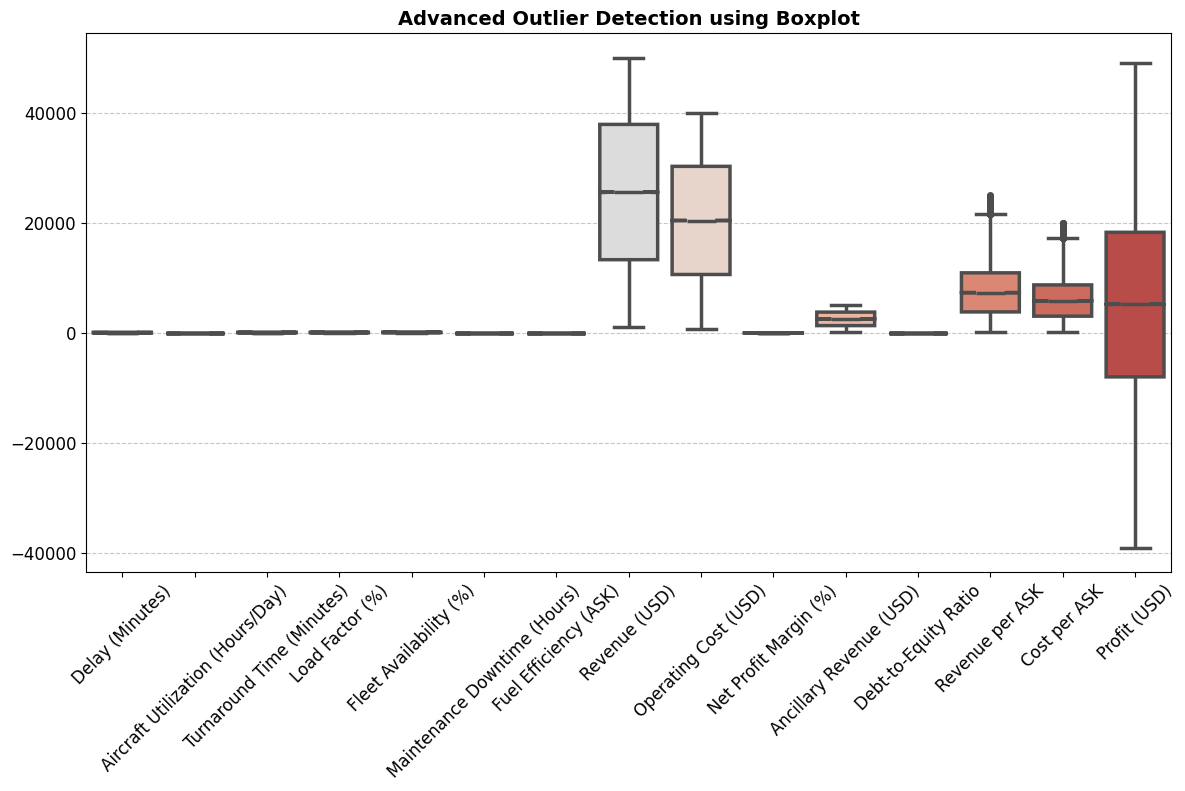

In [14]:
# Advanced Visualization: Box plot for outliers
plt.figure(figsize=(14, 7))
sns.boxplot(data=df.select_dtypes(include=['number']), palette="coolwarm", linewidth=2.5, fliersize=4, notch=True)
plt.title("Advanced Outlier Detection using Boxplot", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


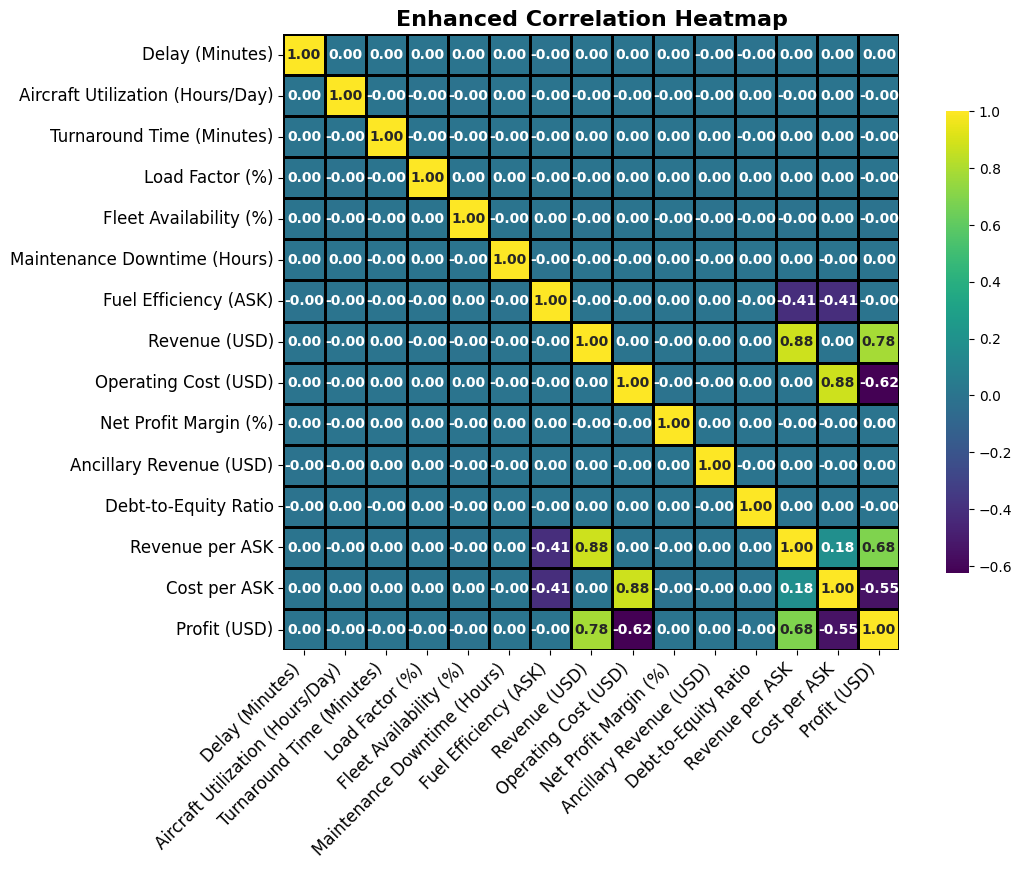

In [16]:
# Enhanced Correlation Heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=2, linecolor='black', square=True, cbar_kws={'shrink': 0.75}, annot_kws={'size': 10, 'weight': 'bold'})
plt.title("Enhanced Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.show()



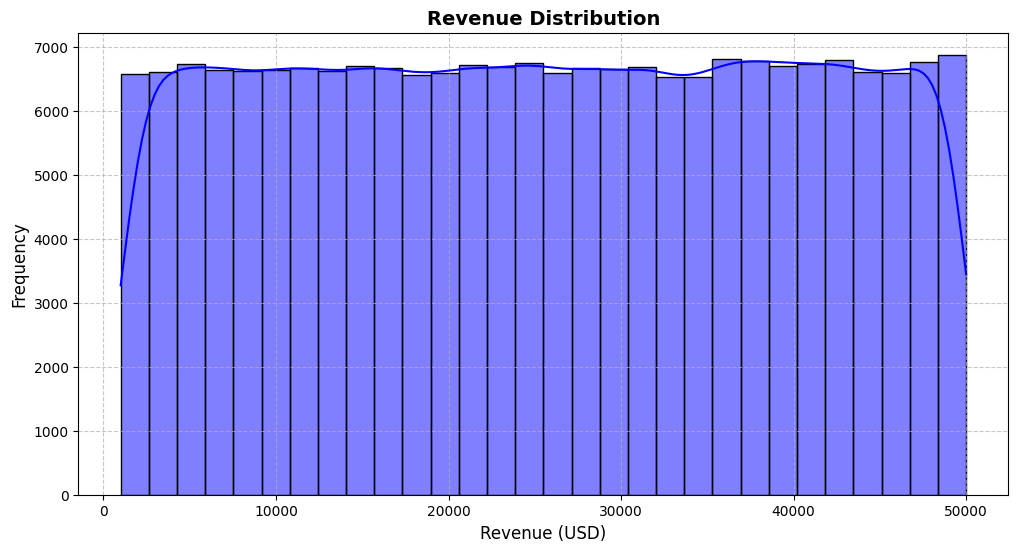

In [19]:
# Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['Revenue (USD)'], bins=30, kde=True, color='blue')
plt.title("Revenue Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Revenue (USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

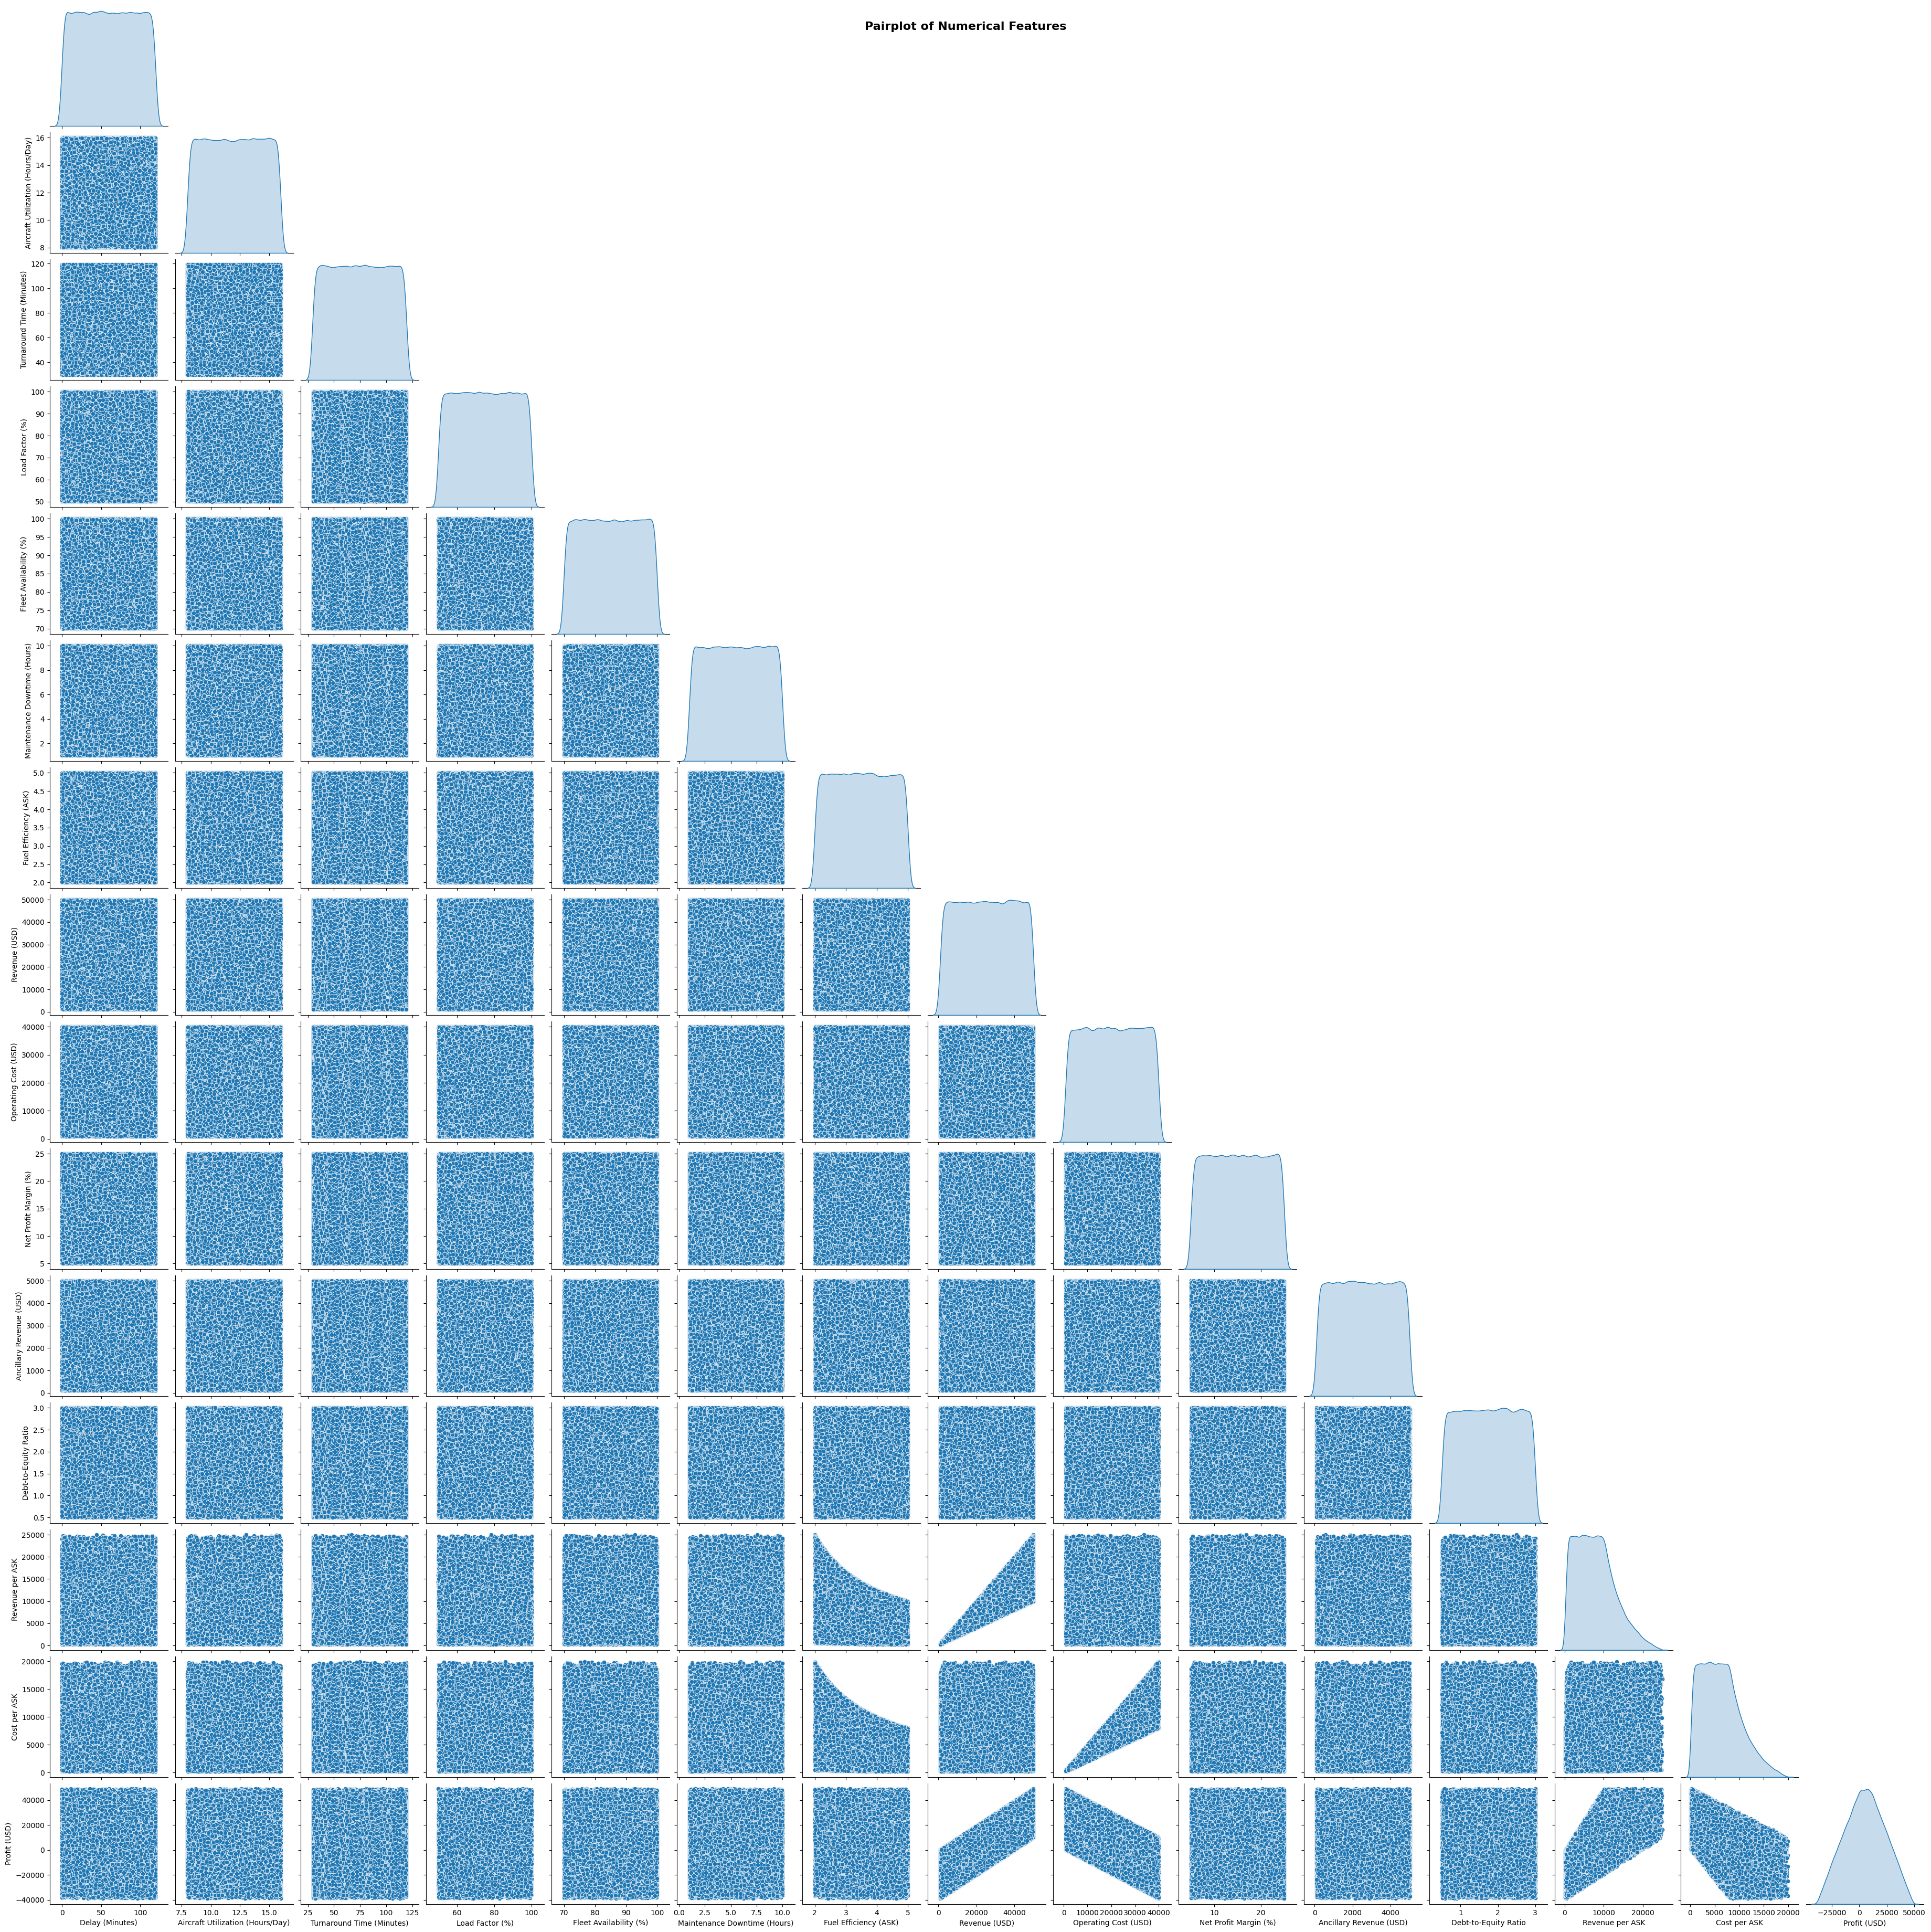

In [20]:
# Pairplot for feature relationships
sns.pairplot(df.select_dtypes(include=['number']), diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", fontsize=16, fontweight='bold')
plt.show()

In [21]:

# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
            Scheduled Departure Time          Actual Departure Time  \
count                         200000                         200000   
mean   2024-06-29 07:21:27.047897856  2024-06-29 08:55:04.198966016   
min       2024-01-01 00:01:53.341000     2024-01-01 00:03:33.981000   
25%    2024-03-30 22:12:47.147000064  2024-03-30 15:40:28.572750080   
50%    2024-06-29 10:33:27.125000192  2024-06-28 20:10:25.013499904   
75%    2024-09-27 09:33:27.652499968  2024-09-28 03:54:08.405749760   
max       2024-12-27 05:14:38.598000     2024-12-27 05:07:36.226000   
std                              NaN                            NaN   

       Delay (Minutes)  Aircraft Utilization (Hours/Day)  \
count     200000.00000                     200000.000000   
mean          59.35885                         12.003438   
min            0.00000                          8.000000   
25%           29.00000                          9.990000   
50%           59.00000                 